w, h = 960 540


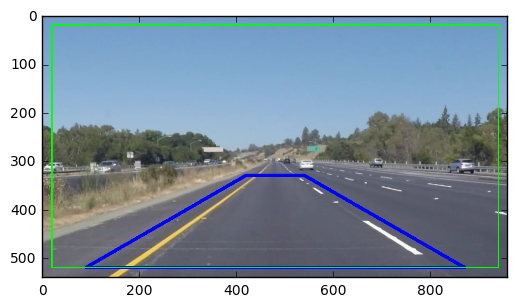

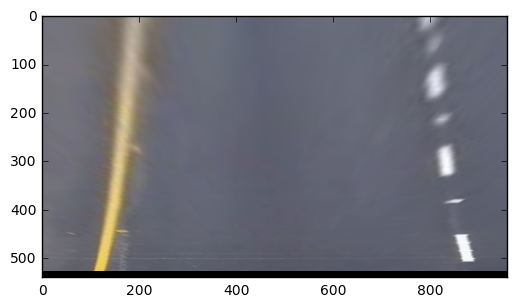

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('test_images/solidYellowLeft.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Frame size
w, h = img.shape[1], img.shape[0]
print('w, h =', w, h)

bottomW = w - 180
topW = 120
topH = h//2 + 60
bottomH = h - 20

# Perspective Transform
PARAMS_DELTA_LEFT_BOTTOM = (120, -20) # (130, 60) (160, -20)
PARAMS_DELTA_LEFT_UP = (-145, 120) # (-10, 30) (-130, 120)
PARAMS_DELTA_RIGHT_UP = (170, 120) # (10, 30) (120, 120)
PARAMS_DELTA_RIGHT_BOTTOM = (-60, -20) # (-80, -60) (-60, -20)
region_deltas = [PARAMS_DELTA_LEFT_BOTTOM, PARAMS_DELTA_LEFT_UP, PARAMS_DELTA_RIGHT_UP, PARAMS_DELTA_RIGHT_BOTTOM]

# region_vertices1 = np.array([[(0      + region_deltas[0][0], h    + region_deltas[0][1]),
#                      (w//2 + region_deltas[1][0], h//2 + region_deltas[1][1]),
#                      (w//2 + region_deltas[2][0], h//2 + region_deltas[2][1]),
#                      (w    + region_deltas[3][0], h    + region_deltas[3][1])]])

region_vertices = np.array([[((w - bottomW) // 2, bottomH),
                             ((w - topW) // 2, topH),
                             ((w + topW) // 2, topH),
                             ((w + bottomW) // 2, bottomH)]])

# print('reg.shape1 =', region_vertices1.shape)
# print('reg1 =', region_vertices1)
# print('reg.shape2 =', region_vertices2.shape)
# print('reg2 =', region_vertices2)

dest_vertices = np.array([[region_vertices[0][0],
                (region_vertices[0][0][0],region_vertices[0][1][1]),
                (region_vertices[0][3][0],region_vertices[0][2][1]),
                region_vertices[0][3]]])
offsetH = 20
offsetW = 20
dest_vertices = np.array([[(offsetW, h - offsetH),
                (offsetW, offsetH),
                (w - offsetW, offsetH),
                (w - offsetW, h - offsetH)]])
#         if sampled:
#             print('region_vertices =', region_vertices)
#             print('dest_vertices =', dest_vertices)

img1 = np.copy(img)
cv2.polylines(img1, region_vertices, True, (0, 0, 255), 5)    
cv2.polylines(img1, dest_vertices, True, (0, 255, 0), 2)
plt.imshow(img1)
plt.show()



M = cv2.getPerspectiveTransform(np.float32(region_vertices), np.float32(dest_vertices))
img2 = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
plt.imshow(img2)
plt.show()


# cv2.imshow("original", img)
# cv2.waitKey(500)
# cv2.destroyAllWindows()

In [2]:
# cv2.destroyAllWindows()